In [8]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15897 sha256=28a8be56d643e18f1dafb895a4a6b131bac877aca43dbecd4104f9ab2026f667
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest


In [9]:
import pyforest

In [1]:
import pandas as pd

FILE_NAME = "https://raw.githubusercontent.com/skathirmani/datasets/refs/heads/main/narendramodi_tweets.csv"

tweets = pd.read_csv(FILE_NAME)

tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [2]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3220 non-null   float64
 1   retweets_count        3220 non-null   float64
 2   favorite_count        3220 non-null   float64
 3   created_at            3220 non-null   object 
 4   text                  3220 non-null   object 
 5   lang                  3220 non-null   object 
 6   retweeted             3220 non-null   bool   
 7   followers_count       3220 non-null   float64
 8   friends_count         3220 non-null   float64
 9   hashtags_count        3220 non-null   float64
 10  description           3220 non-null   object 
 11  location              3220 non-null   object 
 12  background_image_url  3220 non-null   object 
 13  source                3220 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 330.3+ KB


In [4]:
tweets["date"] = pd.to_datetime(tweets["created_at"])

tweets["day"] = tweets["date"].dt.day
tweets["month"] = tweets["date"].dt.month
tweets["year"] = tweets["date"].dt.year
tweets["year_month"] = tweets["date"].dt.to_period("M") # strftime("%Y-%m")
tweets["year_month_day"] = tweets["date"].dt.to_period("D") # strftime("%Y-%m-%d")

tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,date,day,month,year,year_month,year_month_day
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 11:00:07,31,1,2017,2017-01,2017-01-31
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:59:12,31,1,2017,2017-01,2017-01-31
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:33,31,1,2017,2017-01,2017-01-31
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:22,31,1,2017,2017-01,2017-01-31
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:16,31,1,2017,2017-01,2017-01-31


In [15]:
values = tweets.year_month.value_counts()

values.sort_index(inplace=True)

values = pd.DataFrame(values)
values.reset_index(inplace=True)
values.columns = ["year_month", "total_tweets"]

values

,year_month,total_tweets
0,2016-03,157
1,2016-04,201
2,2016-05,307
3,2016-06,413
4,2016-07,303
5,2016-08,383
6,2016-09,292
7,2016-10,393
8,2016-11,255
9,2016-12,260


<IPython.core.display.Javascript object>

<Axes: ylabel='total_tweets'>

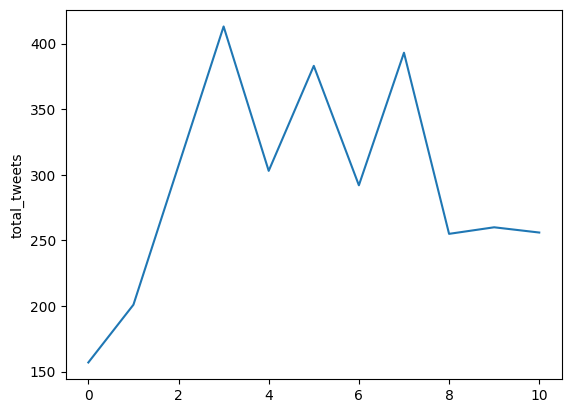

In [16]:
sns.lineplot(values.total_tweets)

In [19]:
tweets.resample(on="date", rule="ME")["id"].count()
# here the rules can be M - month, Y - Year, d - day, ME - Month End, YE - Year End
# similary for Start of Period is MS, YS etc

,id
date,
2016-03-31,157
2016-04-30,201
2016-05-31,307
2016-06-30,413
2016-07-31,303
2016-08-31,383
2016-09-30,292
2016-10-31,393
2016-11-30,255


In [20]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3220 non-null   float64       
 1   retweets_count        3220 non-null   float64       
 2   favorite_count        3220 non-null   float64       
 3   created_at            3220 non-null   object        
 4   text                  3220 non-null   object        
 5   lang                  3220 non-null   object        
 6   retweeted             3220 non-null   bool          
 7   followers_count       3220 non-null   float64       
 8   friends_count         3220 non-null   float64       
 9   hashtags_count        3220 non-null   float64       
 10  description           3220 non-null   object        
 11  location              3220 non-null   object        
 12  background_image_url  3220 non-null   object        
 13  source            

<Axes: xlabel='date'>

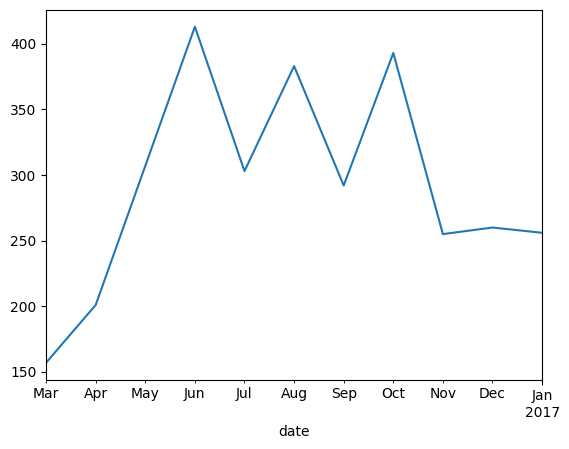

In [21]:
tweets.resample(on="date", rule="ME")["id"].count().plot.line()

<Axes: xlabel='date'>

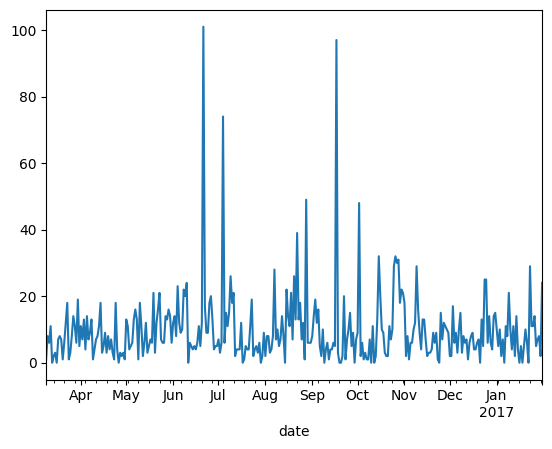

In [22]:
tweets.resample(on="date", rule="d")["id"].count().plot.line()

In [23]:
tweets.shape

(3220, 20)

In [24]:
tweets.isnull().sum()

,0
id,0
retweets_count,0
favorite_count,0
created_at,0
text,0
lang,0
retweeted,0
followers_count,0
friends_count,0
hashtags_count,0


## Handling Missing Values
- h

In [26]:
X = pd.Series([1,2,np.nan, 5,8, np.nan])

df = pd.DataFrame({
    "Sales": X
})

df["fill_mean"] = df["Sales"].fillna(df["Sales"].mean())
df["fill_median"] = df["Sales"].fillna(df["Sales"].median())
df["back_fill"] = df["Sales"].fillna(method="bfill")
df["forward_fill"] = df["Sales"].fillna(method="ffill")
df["interpolate"] = df["Sales"].interpolate()

df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-26-4e8a613ba7a2>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["back_fill"] = df["Sales"].fillna(method="bfill")
<ipython-input-26-4e8a613ba7a2>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["forward_fill"] = df["Sales"].fillna(method="ffill")


,Sales,fill_mean,fill_median,back_fill,forward_fill,interpolate
0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0,2.0
2,NaN,4.0,3.5,5.0,2.0,3.5
3,5.0,5.0,5.0,5.0,5.0,5.0
4,8.0,8.0,8.0,8.0,8.0,8.0
5,NaN,4.0,3.5,NaN,8.0,8.0


In [10]:
Passengers_File = "https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv"

passengers = pd.read_csv(Passengers_File)

passengers.head()

<IPython.core.display.Javascript object>

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
passengers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
passengers['Month'] = pd.to_datetime(passengers['Month'], format="%Y-%m")

passengers.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [30]:
passengers.shape

(144, 2)

In [35]:
tweets.plot.line(x="Month", y="Passengers")

KeyError: 'Month'

<Axes: xlabel='Month'>

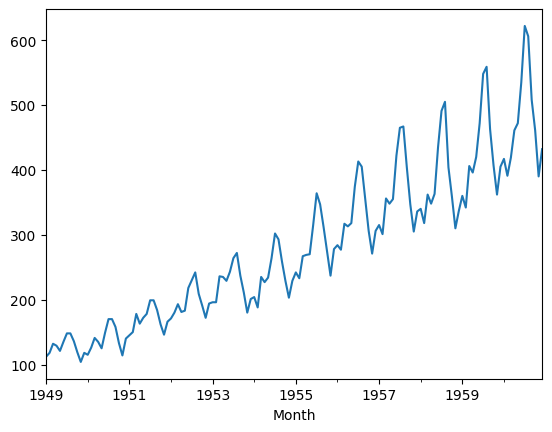

In [12]:
ts_passengers = passengers.set_index("Month")["Passengers"]

ts_passengers.plot.line()

In [37]:
ts_passengers.shape

(144,)

In [13]:
ts_train = ts_passengers[:100]
ts_test = ts_passengers[100:]

ts_train.shape, ts_test.shape

((100,), (44,))

<IPython.core.display.Javascript object>

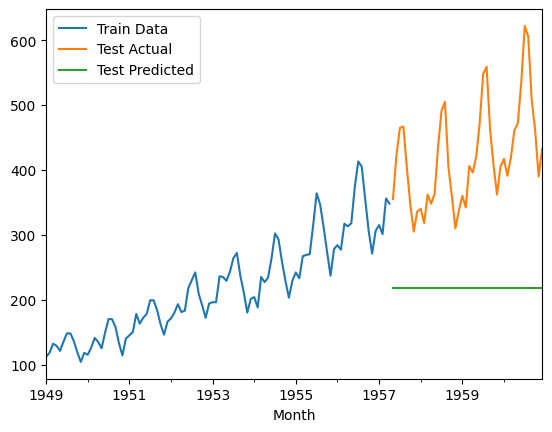

In [45]:
ts_train.plot.line()
ts_test.plot.line()
pd.Series([ts_train.mean()] * len(ts_test), index=ts_test.index).plot.line()
plt.legend(["Train Data", "Test Actual", "Test Predicted"])


<IPython.core.display.Javascript object>

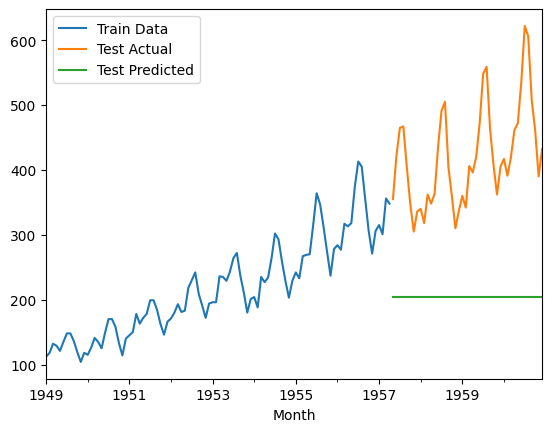

In [46]:
ts_train.plot.line()
ts_test.plot.line()
pd.Series([ts_train.median()] * len(ts_test), index=ts_test.index).plot.line()
plt.legend(["Train Data", "Test Actual", "Test Predicted"])

In [47]:
ts_train.mean(), ts_train.median()

(218.36, 203.5)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

rmse = root_mean_squared_error(ts_test, [ts_train.mean()] * len(ts_test))

rmse

216.64411025710095

In [50]:
ts_train.index.diff()  # To Undestand the difference between each record in duration for Time Series Data Frame

TimedeltaIndex([      NaT, '31 days', '28 days', '31 days', '30 days',
                '31 days', '30 days', '31 days', '31 days', '30 days',
                '31 days', '30 days', '31 days', '31 days', '28 days',
                '31 days', '30 days', '31 days', '30 days', '31 days',
                '31 days', '30 days', '31 days', '30 days', '31 days',
                '31 days', '28 days', '31 days', '30 days', '31 days',
                '30 days', '31 days', '31 days', '30 days', '31 days',
                '30 days', '31 days', '31 days', '29 days', '31 days',
                '30 days', '31 days', '30 days', '31 days', '31 days',
                '30 days', '31 days', '30 days', '31 days', '31 days',
                '28 days', '31 days', '30 days', '31 days', '30 days',
                '31 days', '31 days', '30 days', '31 days', '30 days',
                '31 days', '31 days', '28 days', '31 days', '30 days',
                '31 days', '30 days', '31 days', '31 days', '30 days',
      

In [53]:
start_date = ts_train.index[0]
end_date = ts_train.index[-1]
dates = pd.date_range(start_date, end_date, freq="MS")

dates

start_date, end_date, len(dates), len(ts_train)
# If  there is diffrence in the generated and actual data size then it indicates that there are missing values in the data
# For this case first we tried with ME it gave one missing records so we choose to have MS to full fill the missing records

(Timestamp('1949-01-01 00:00:00'), Timestamp('1957-04-01 00:00:00'), 100, 100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

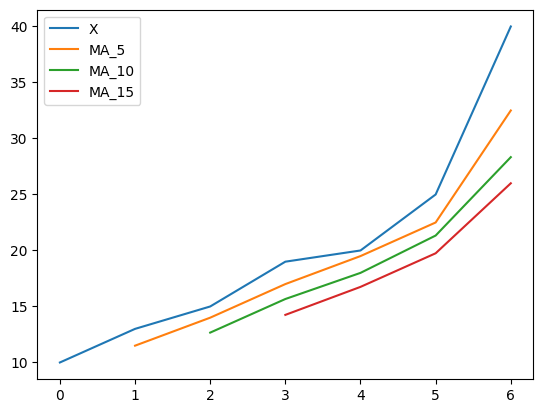

In [6]:
x = pd.Series([10,13,15, 19, 20, 25, 40])

df_ma = pd.DataFrame({
    "X": x,
    "MA_5": x.rolling(2).mean(),
    "MA_10": x.rolling(3).mean(),
    "MA_15": x.rolling(4).mean(),
})

df_ma.plot.line()

<IPython.core.display.Javascript object>

<Axes: xlabel='Month'>

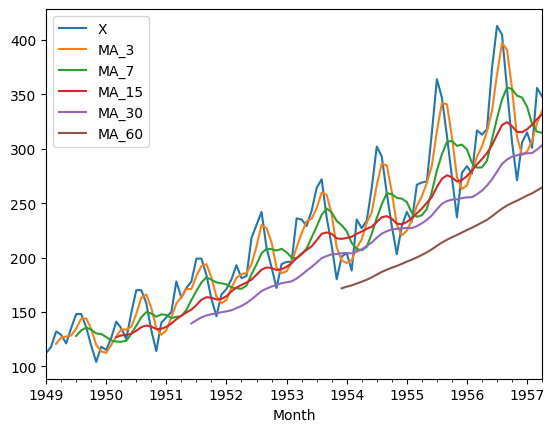

In [14]:
df_airpassengers = pd.DataFrame({
    'X': ts_train,
    'MA_3': ts_train.rolling(3).mean(),
    'MA_7': ts_train.rolling(7).mean(),
    'MA_15': ts_train.rolling(15).mean(),
    'MA_30': ts_train.rolling(30).mean(),
    'MA_60': ts_train.rolling(60).mean(),
})

df_airpassengers.plot.line()

In [15]:
TEST_FILE_PATH = "" # @param {"type":"string","placeholder":"DatasetPath"}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

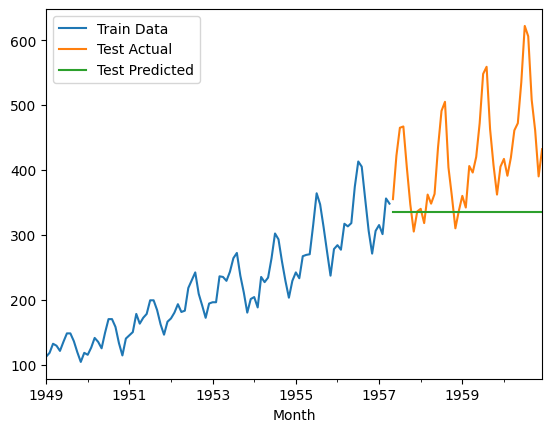

In [16]:
air_ma3 = ts_train.rolling(3).mean()

ts_test_pred = pd.Series([air_ma3.iloc[-1]] * len(ts_test), index=ts_test.index)


ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line()
plt.legend(["Train Data", "Test Actual", "Test Predicted"])

In [19]:
root_mean_squared_error(ts_test, ts_test_pred)

115.11644302420682

## Exponential Smoothing
- Simple Exponential Smooting
- Double Exponential Smoothing (Holts Method)
- Triple Exponential Smoothing (Holt - Winters Method)

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

model_ses = SimpleExpSmoothing(ts_train, initialization_method="estimated" )

model_ses_fit = model_ses.fit(optimized=True)

model_ses_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Passengers,No. Observations:,100
Model:,SimpleExpSmoothing,SSE,55088.000
Optimized:,True,AIC,635.152
Trend:,None,BIC,640.362
Seasonal:,None,AICC,635.573
Seasonal Periods:,None,Date:,"Sat, 30 Nov 2024"
Box-Cox:,False,Time:,10:27:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,111.99984,l.0,True


<IPython.core.display.Javascript object>

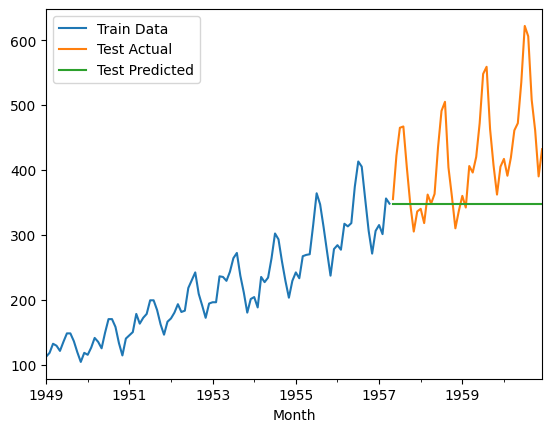

In [25]:
ts_test_pred = model_ses_fit.forecast(steps=len(ts_test))

ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line()
plt.legend(["Train Data", "Test Actual", "Test Predicted"])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>

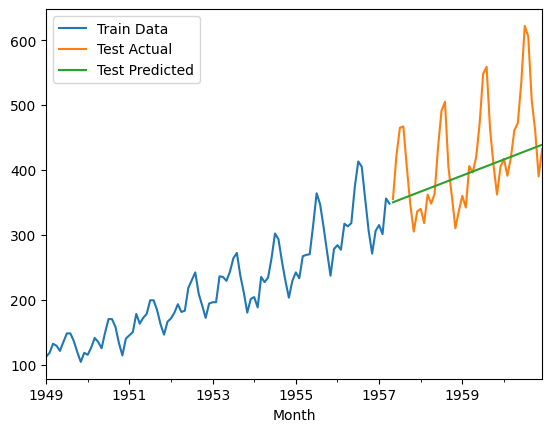

In [14]:
from statsmodels.tsa.api import Holt


model_holt = Holt(ts_train, initialization_method='estimated')

model_holt_fitted = model_holt.fit(optimized=True)

ts_test_pred = model_holt_fitted.forecast(steps=len(ts_test))

ts_train.plot.line()

ts_test.plot.line()

ts_test_pred.plot.line();

plt.legend(['Train Data', 'Test Actual', 'Test Predicted']);